In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston=load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge 


##변수 지정
#pipeline
scaler=StandardScaler()
preprocessing_1=PolynomialFeatures()
estimator_1=Ridge()
#grid search
cv=5
param_grid={'preprocessing_1__degree':[1,2,3],
           'estimator_1__alpha':[0.001,0.01,0.1,1,10,100]}


#make pipe
pipe = Pipeline([('scaler',scaler),
                 ('preprocessing_1',preprocessing_1),
                 ('estimator_1',estimator_1)
                ])
#searching
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train,y_train)




#visualization
print('best params:',grid.best_params_)
print()
print(f'train_score:{grid.score(X_train,y_train):.2f}')
print(f'test_score:{grid.score(X_test,y_test):.2f}')
    

best params: {'estimator_1__alpha': 10, 'preprocessing_1__degree': 2}

train_score:0.94
test_score:0.77


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
param_grid_keys=[]
for i in list(param_grid.keys()):
    param_grid_keys.append('param_'+i)

print(param_grid_keys)






['param_preprocessing_1__degree', 'param_estimator_1__alpha']


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
p=pd.pivot_table(pd.DataFrame(grid.cv_results_),
                 values='mean_test_score',
                 index='param_preprocessing_1__degree',
                 columns='param_estimator_1__alpha')

# p=p[p>0].fillna(0)


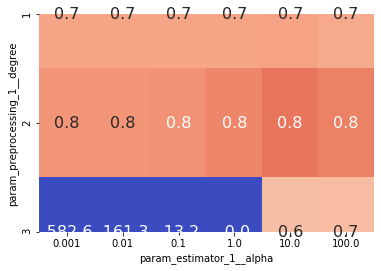

In [65]:
p = sns.heatmap(df,
                vmin=0,vmax=1,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':16},
                cbar=False)

In [31]:
heat_x='preprocessing_1__degree'
heat_y='estimator_1__alpha'

df=pd.pivot_table(pd.DataFrame(grid.cv_results_),
                 values='mean_test_score',
                 index='param_'+heat_x,
                 columns='param_'+heat_y)

# sns.heatmap(heatmap,vmin=0,vmax=1,annot=True,linewidth=1)
df

param_estimator_1__alpha,0.001,0.010,0.100,1.000,10.000,100.000
param_preprocessing_1__degree,,,,,,
1,0.721735,0.721739,0.721773,0.722083,0.723133,0.707798
2,0.759798,0.759075,0.766256,0.794656,0.828513,0.804709
3,-582.627406,-161.323929,-13.233571,-0.033978,0.647699,0.653349


TypeError: 'module' object is not subscriptable

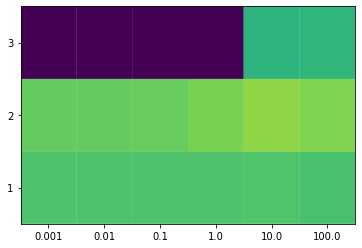

In [54]:
plt.pcolor(df,vmin=0,vmax=1,edgecolors='face')

plt.xticks(np.arange(0.5,len(df.columns)), df.columns)
plt.yticks(np.arange(0.5,len(df.index)), df.index)
# annotation
for i in range(len(df.columns)):
    for j in range(len(df.index)):
        text = plt.text(j, i, plt[i, j],
                       ha="center", va="center", color="w")

plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel(heat_x, fontsize=14)
plt.ylabel(heat_y, fontsize=14)

plt.colorbar()

In [47]:
df.columns

Float64Index([0.001, 0.01, 0.1, 1.0, 10.0, 100.0], dtype='float64', name='param_estimator_1__alpha')

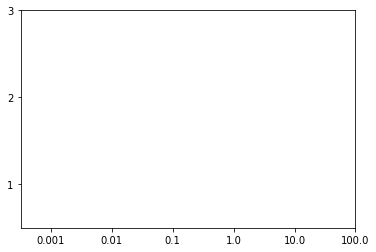

In [62]:
# plt.figure()
# sns.heatmap(df,vmin=0,vmax=1,annot=True,linewidth=1)
plt.xticks(np.arange(0.5,len(df.columns),1), df.columns)
plt.yticks(np.arange(0.5,len(df.index),1), df.index)

plt.show()

In [24]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator_1__alpha,param_preprocessing_1__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010173,0.001163,0.000998,5.091228e-07,0.001,1,"{'estimator_1__alpha': 0.001, 'preprocessing_1...",0.762602,0.569560,0.779352,0.707744,0.790320,0.721735,0.081329,11
1,0.010772,0.004108,0.002992,1.335144e-06,0.001,2,"{'estimator_1__alpha': 0.001, 'preprocessing_1...",0.813194,0.639721,0.631639,0.814685,0.901616,0.759798,0.106493,5
2,0.025929,0.004039,0.012568,2.239352e-03,0.001,3,"{'estimator_1__alpha': 0.001, 'preprocessing_1...",-1.126277,-21.177170,-2883.048048,0.265587,-0.390104,-582.627406,1152.134978,18
3,0.002194,0.000399,0.001197,3.989494e-04,0.01,1,"{'estimator_1__alpha': 0.01, 'preprocessing_1_...",0.762617,0.569557,0.779353,0.707737,0.790333,0.721739,0.081334,10
4,0.005984,0.001261,0.002792,3.986601e-04,0.01,2,"{'estimator_1__alpha': 0.01, 'preprocessing_1_...",0.816558,0.635223,0.628425,0.816252,0.900785,0.759075,0.108586,6
5,0.024935,0.001094,0.012166,1.165618e-03,0.01,3,"{'estimator_1__alpha': 0.01, 'preprocessing_1_...",-0.389726,-7.330490,-797.614091,0.596622,0.243932,-161.323929,318.682987,17
6,0.002993,0.000001,0.001196,3.984693e-04,0.1,1,"{'estimator_1__alpha': 0.1, 'preprocessing_1__...",0.762760,0.569525,0.779360,0.707666,0.790459,0.721773,0.081385,9
7,0.004788,0.000977,0.002195,7.460263e-04,0.1,2,"{'estimator_1__alpha': 0.1, 'preprocessing_1__...",0.817204,0.641411,0.627082,0.830967,0.916594,0.766256,0.113324,4
8,0.022940,0.002091,0.010970,8.914836e-04,0.1,3,"{'estimator_1__alpha': 0.1, 'preprocessing_1__...",0.383167,-3.108991,-64.588928,0.773371,0.554952,-13.233571,25.759824,16
9,0.002394,0.000798,0.001197,3.989469e-04,1,1,"{'estimator_1__alpha': 1, 'preprocessing_1__de...",0.764140,0.569216,0.779410,0.706957,0.791605,0.722083,0.081866,8
